# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

## Пример построения  двухслойной нейронной сети на numpy

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

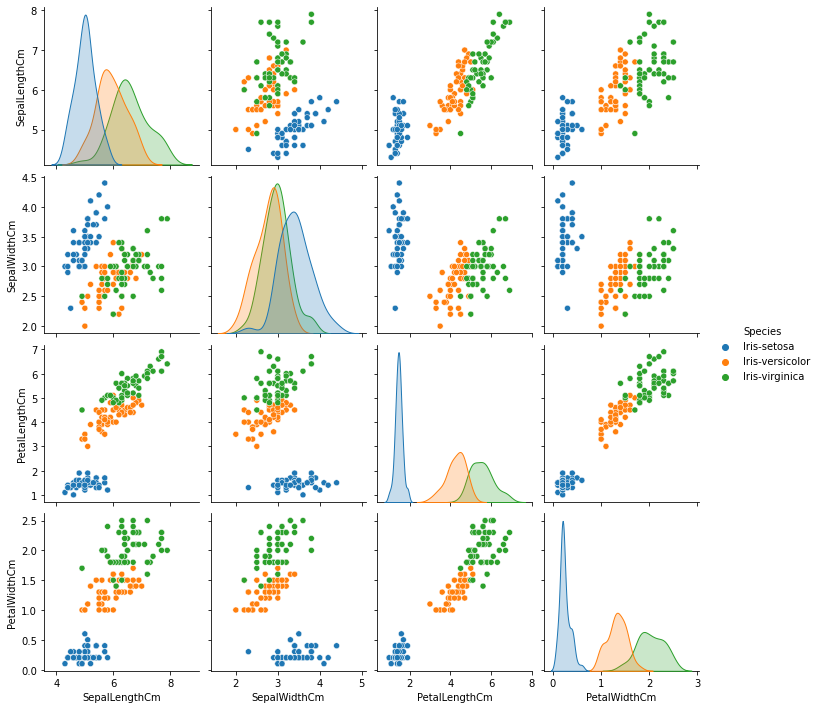

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

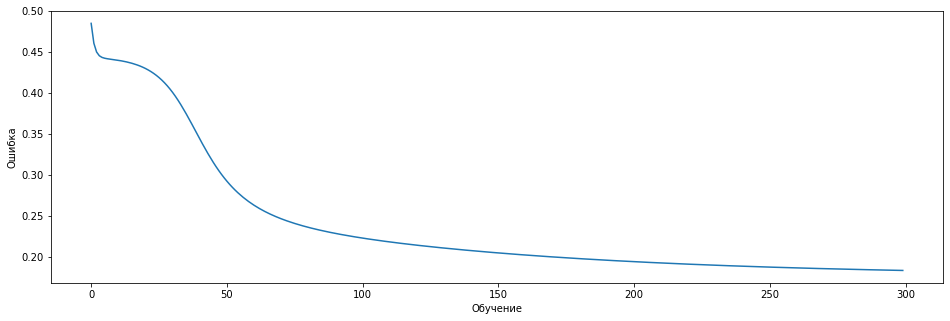

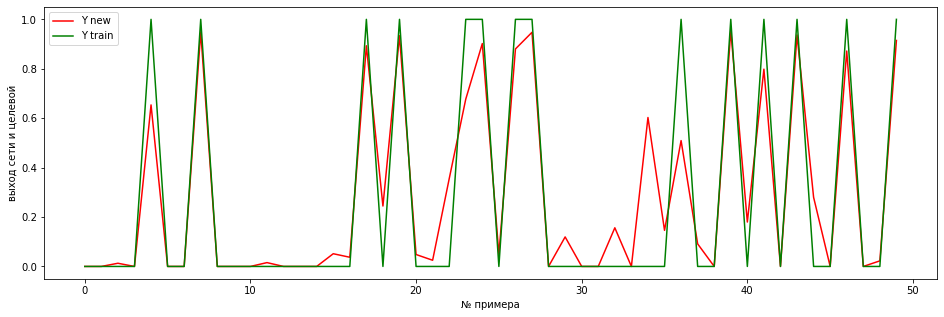

Аккуратность нейронной сети 81.65%


In [4]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 2


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(300):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

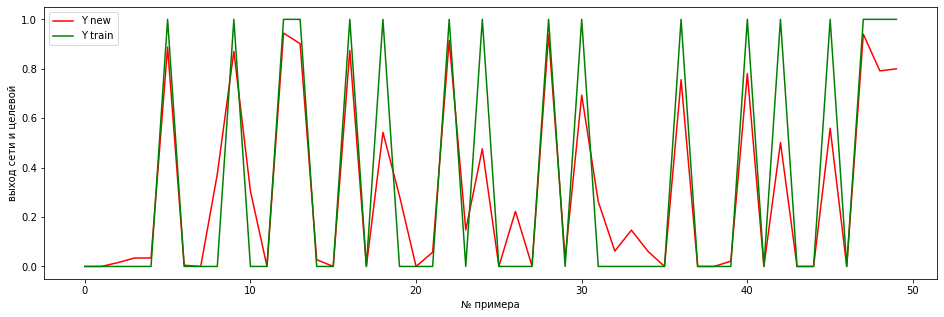

Аккуратность нейронной сети на тесте 80.41%


In [5]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

В этом уроке мы с вами рассматривали как сделать простые нейронные сети без использования специальных фреймворков и библиотек для этого. В следующих уроках мы с вами познакомимся как делать нейронные сети с помощью Keras и TensorFlow.

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

Мы разобрались с основами обучения нейронных сетей и получили некоторое представление об архитектурах простых нейронных сетей. Давайте попробуем закрепить эти знания на практике. Кроме того на примере который будет изложен ниже возможно проясняться какие-либо оставшиеся вопросы.

В данном примере мы сделаем нейронную сеть которая будет отличать различные виды ириса между собой. Надо полагать данный датасет вам уже знаком. Логика работы этого кода будет такой же как и в первом разобранном примере, но только все компоненты этого кода будут несколько усложнены.

In [6]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

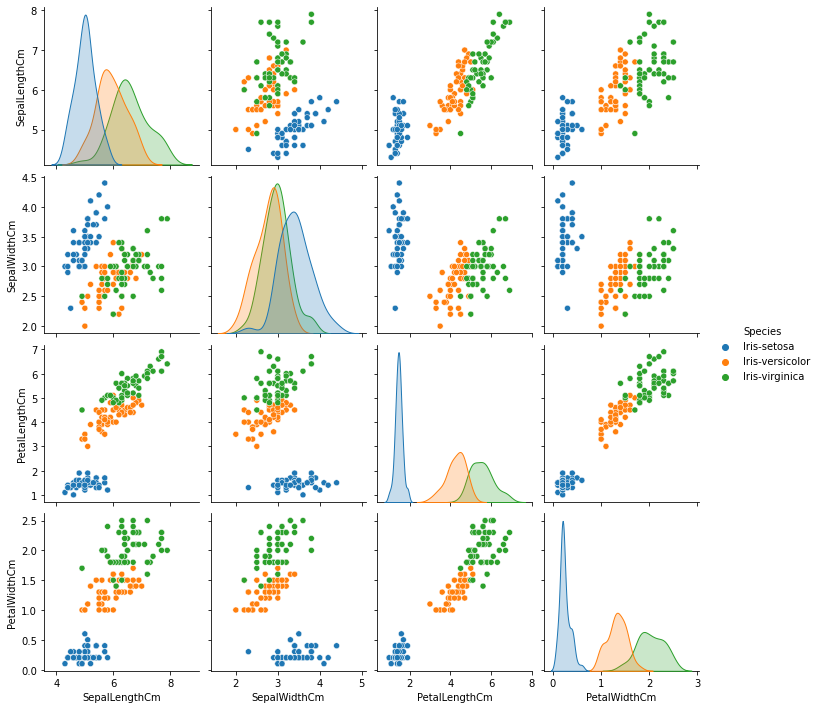

In [7]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [10]:
### Шаг 3. Обученние нейронной сети
def neural(neuron_numb=2, n=0.1, value=300):
  
    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(value):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100


    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2[:N,1], 'r',label = 'Y new')
    plt.plot(y_train[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть 

    print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
    print(f'Количество нейронов - {neuron_numb}, скорость обучения - {n}, количество эпох обучения - {value}')
    print(end='\n\n\n')
    
    """Проверка на данных X_test"""
    # прямое распространение(feed forward)
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t

    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
    plt.plot(y_test[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть

    # метрика модели
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100
    print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

### 1. Увеличим количество эпох обучения (до 1000)

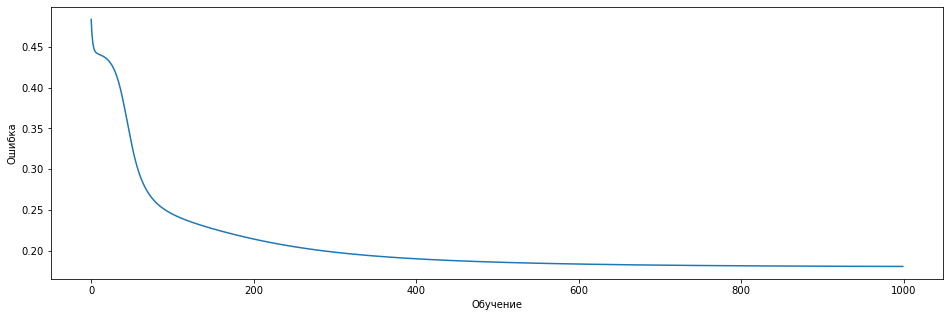

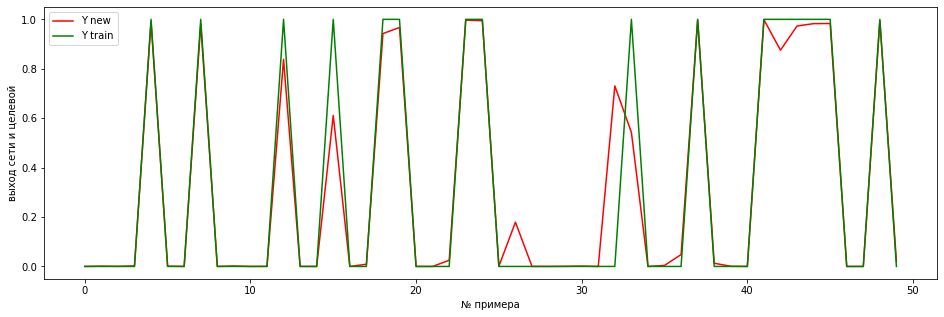

Аккуратность нейронной сети 81.94%
Количество нейронов - 2, скорость обучения - 0.1, количество эпох обучения - 1000





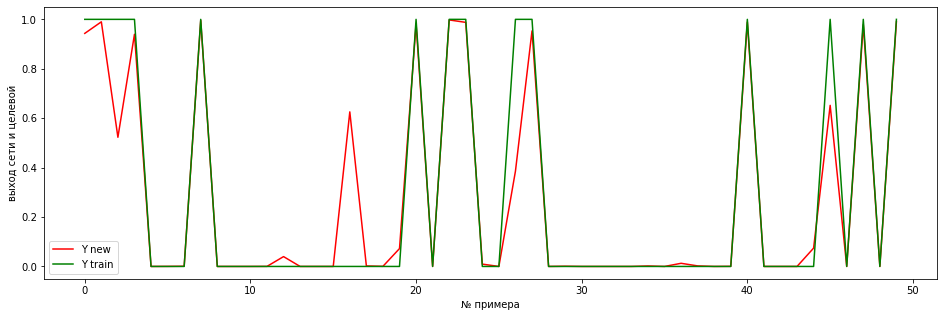

Аккуратность нейронной сети на тесте 82.93%


In [12]:
neural(neuron_numb=2, n=0.1, value=1000)

__Хорошо получилось, так как результат на тесте лучше!__

### 2. Попробуем увеличить до 10000 количество эпох

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


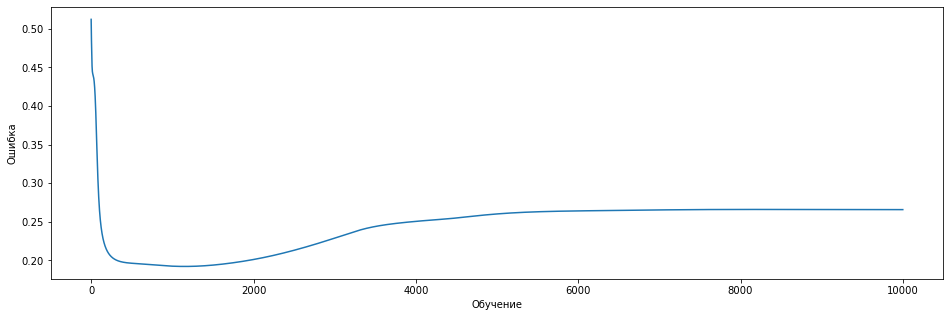

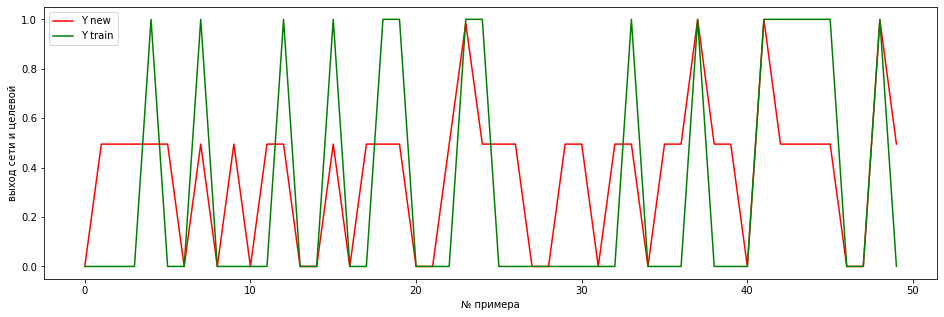

Аккуратность нейронной сети 73.42%
Количество нейронов - 2, скорость обучения - 0.1, количество эпох обучения - 10000





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


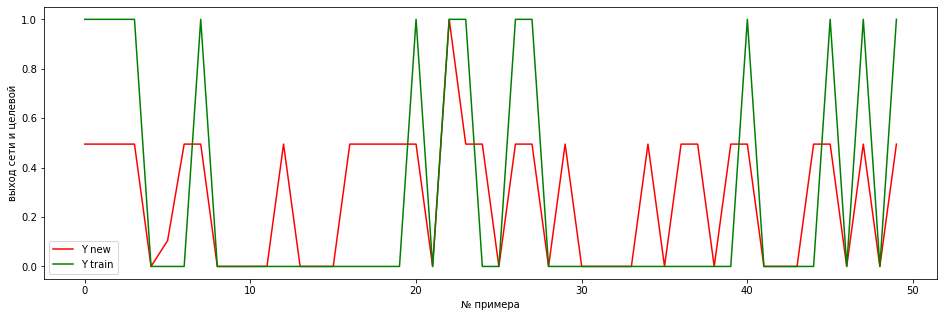

Аккуратность нейронной сети на тесте 77.22%


In [14]:
neural(neuron_numb=2, n=0.1, value=10000)

__При значительном увеличении эпох обучения результат упал!__

__При value = 100000: Аккуратность также продолжает падать, поэтому следующим шагом попробуем изменить количество нейронов__ 

### 3. Изменим количество нейронов, но при этом начнем с начального количества эпох value = 300

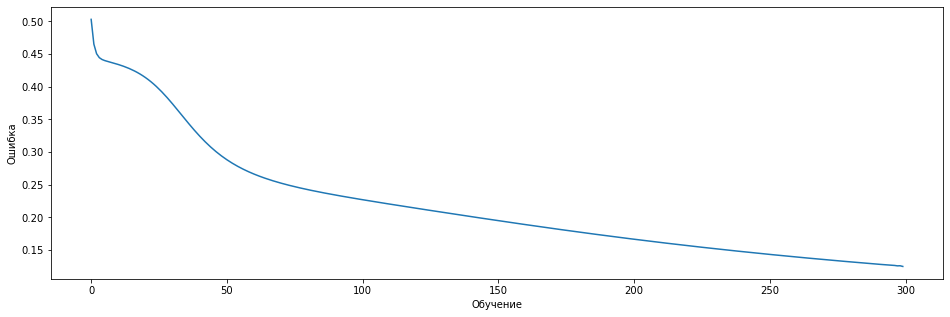

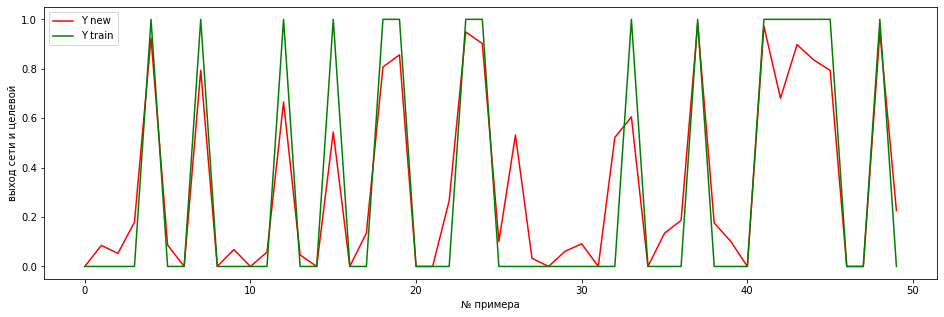

Аккуратность нейронной сети 87.52%
Количество нейронов - 5, скорость обучения - 0.1, количество эпох обучения - 300





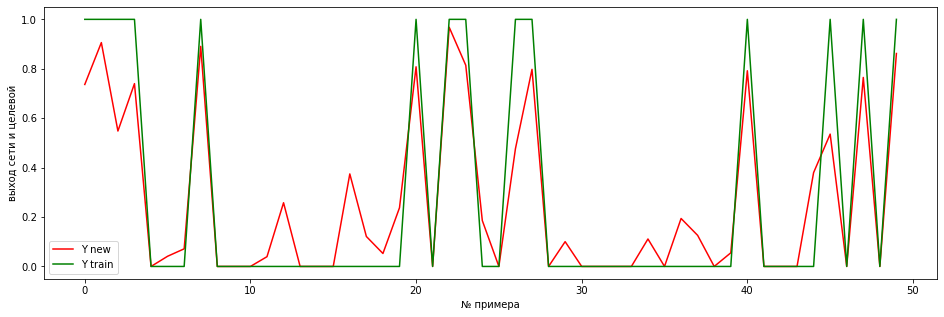

Аккуратность нейронной сети на тесте 89.05%


In [19]:
neural(neuron_numb=5, n=0.1, value=300)

__Точность нейронной сети выросла__

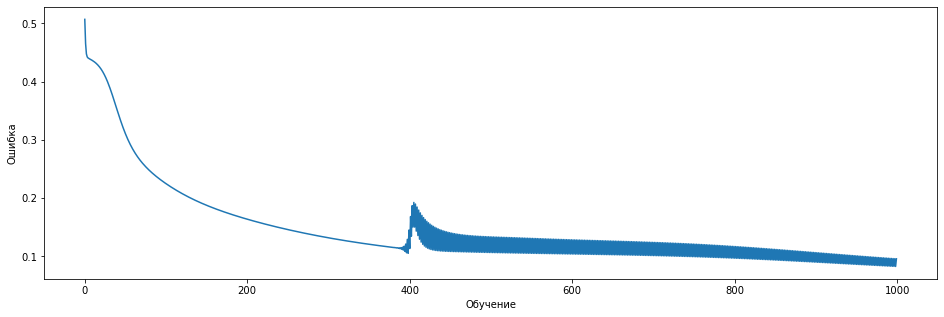

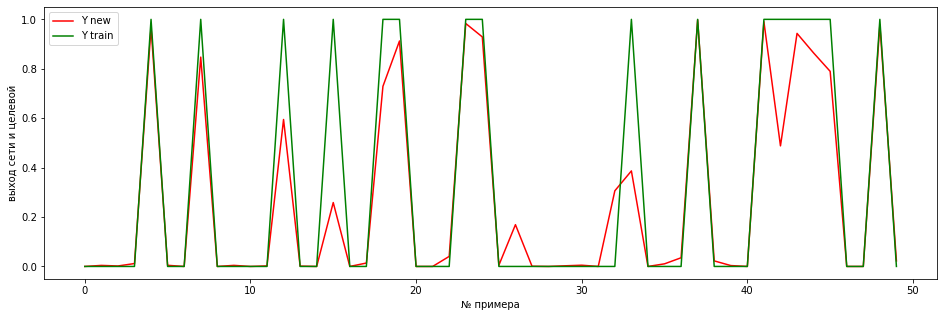

Аккуратность нейронной сети 90.41%
Количество нейронов - 5, скорость обучения - 0.1, количество эпох обучения - 1000





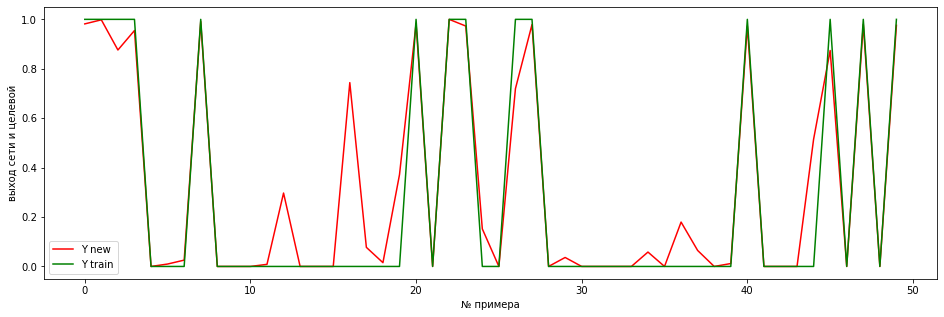

Аккуратность нейронной сети на тесте 93.02%


In [20]:
neural(neuron_numb=5, n=0.1, value=1000)

__С увеличением эпох точность продолжает расти__

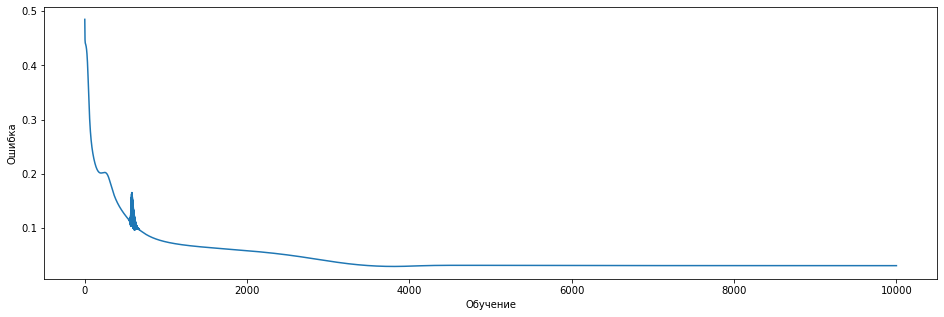

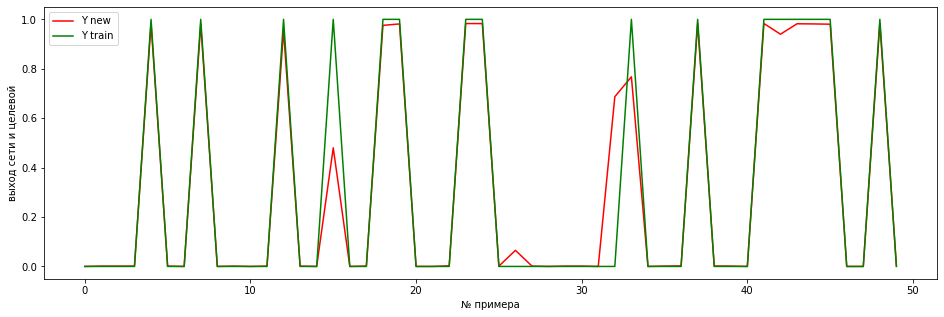

Аккуратность нейронной сети 96.98%
Количество нейронов - 5, скорость обучения - 0.1, количество эпох обучения - 10000





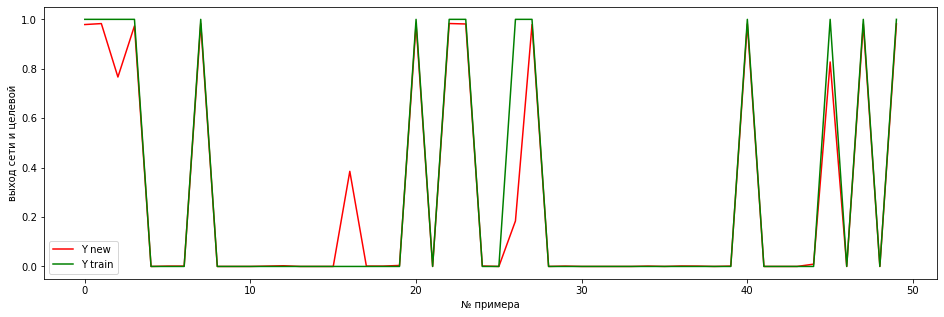

Аккуратность нейронной сети на тесте 96.5%


In [22]:
neural(neuron_numb=5, n=0.1, value=10000)

__Точность растет, результат улучшается.__

__Вывод: с увеличением эпох обучения точность нейронной сети увеличивается и приближается к 100%__

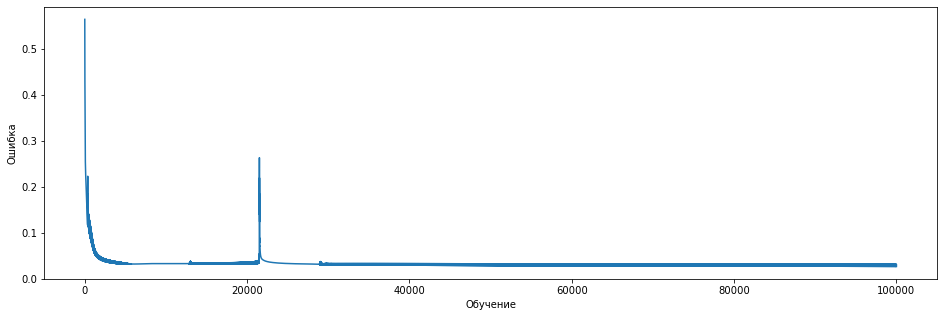

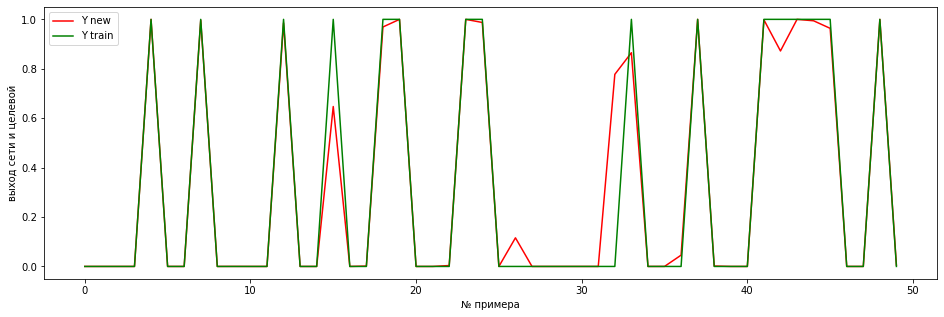

Аккуратность нейронной сети 97.33%
Количество нейронов - 5, скорость обучения - 0.1, количество эпох обучения - 100000





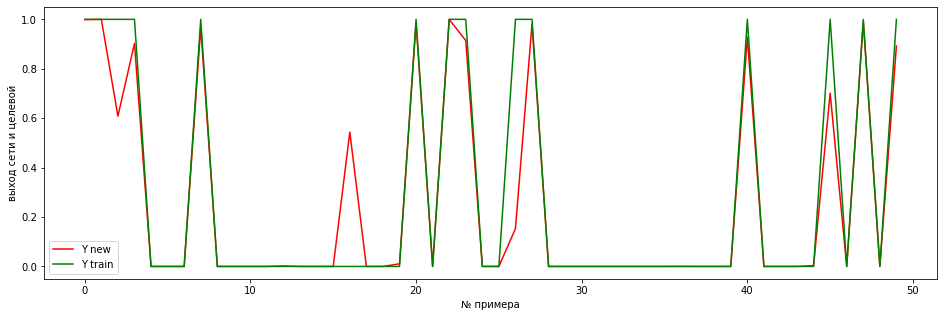

Аккуратность нейронной сети на тесте 96.62%


In [24]:
neural(neuron_numb=5, n=0.1, value=100000)

__Точность продолжает расти, дальше не вижу смысла увеличивать количества эпох обучения и перейти к следующему шагу, поработать со скорость обучения!__

### 4. Изменим скорость обучения, по стандарту у нас 0.1, попробуем уменьшить до 0.01

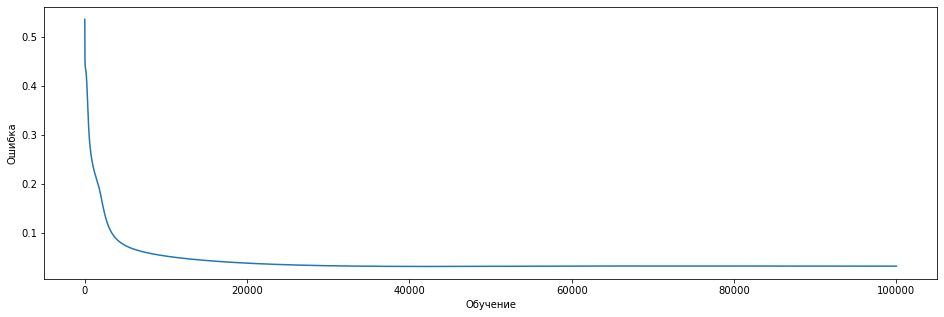

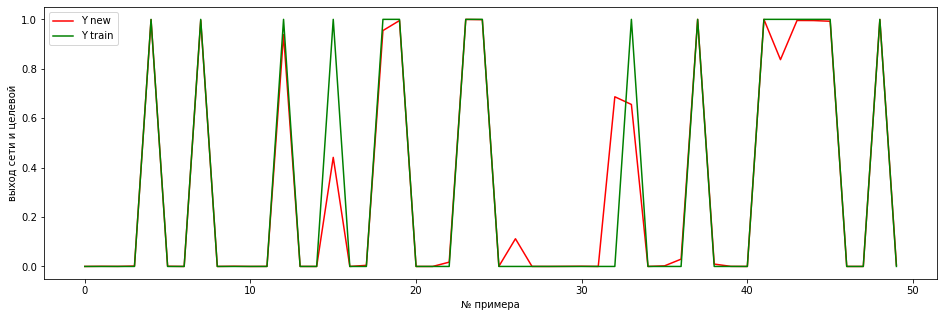

Аккуратность нейронной сети 96.74%
Количество нейронов - 5, скорость обучения - 0.01, количество эпох обучения - 100000





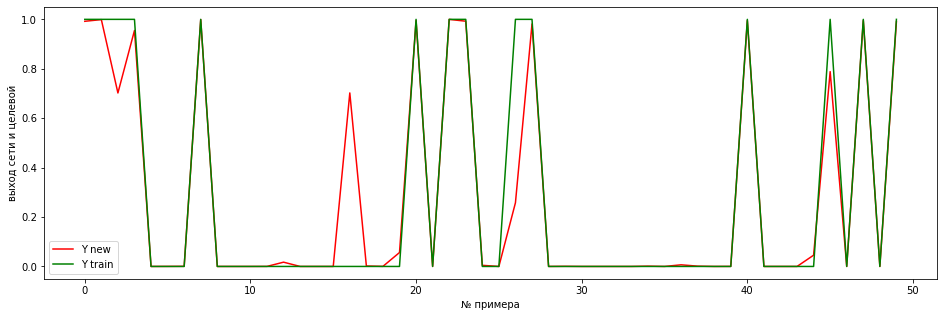

Аккуратность нейронной сети на тесте 97.02%


In [25]:
neural(neuron_numb=5, n=0.01, value=100000)

__Неплохо, на трайне результат уменьшился, но на тесте наоборот получили прирост!__

### 5. Теперь попробуем изменить функцию в нашей нейронной сети и вместо sigmoid использовать ReLU

Не будем эксперементировать с подбором параметров, используем следующие данные, так как они показали отличные результаты:

neuron_numb=5, n=0.1, value=100000

In [27]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# ReLU
def relu(x):
    return x * (x > 0)

# производная ReLU
def relu_deriv(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

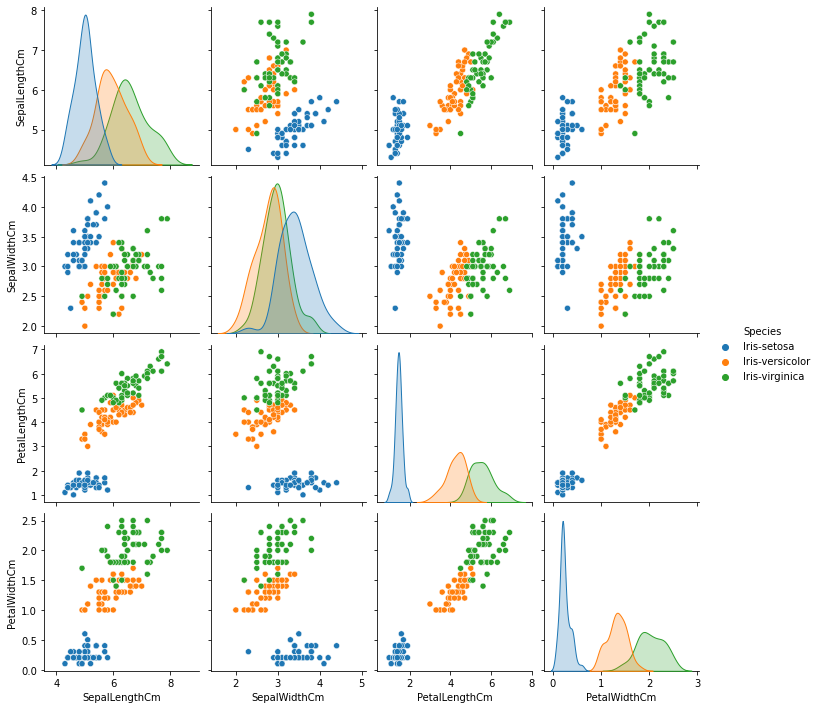

In [28]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

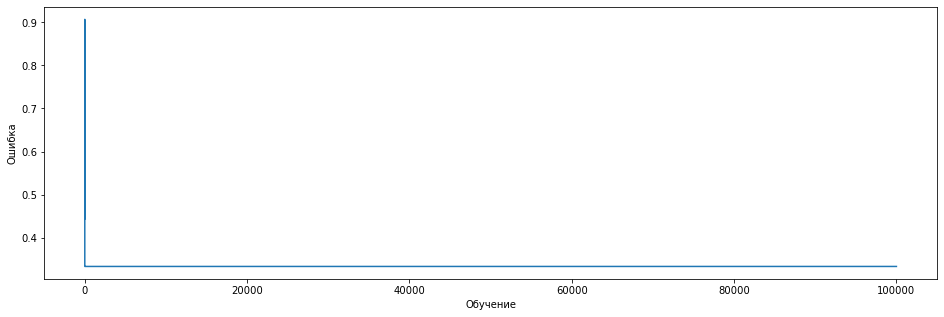

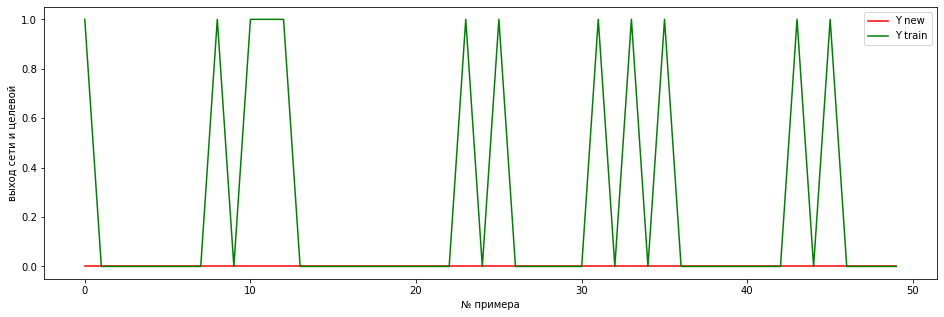

Аккуратность нейронной сети 66.67%


In [29]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = relu(np.dot(layer0, w0))
    layer2 = relu(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * relu_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * relu_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

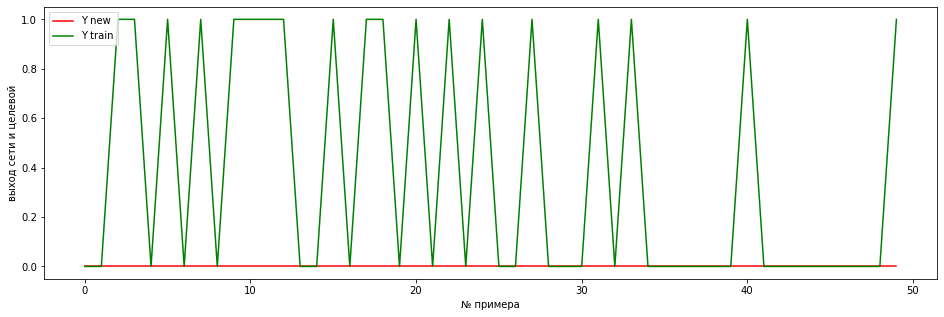

Аккуратность нейронной сети на тесте 66.67%


In [30]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = relu(np.dot(layer0_t, w0))
layer2_t = relu(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

Очень интересно, функция ReLu у нас лежит на оси х и не принимает никаких значений, кроме 0. Также точность нейронной сети по сравнению с sigmoid упала конкретно. От себя могу предположить, что на данном примере видно недостаток функции ReLU, а именно проблема умирающего ReLU. Так как часть производной функции равна нулю, то и градиент для нее будет нулевым, а то это значит, что веса не будут изменяться во время спуска и нейронная сеть перестанет обучаться.

Функцию активации ReLU следует использовать, если нет особых требований для выходного значения нейрона, вроде неограниченной области определения. Но если после обучения модели результаты получились не оптимальные, то стоит перейти к другим функциям, которые могут дать лучший результат.

### 6. Подведем итоги, создадим DataFrame с результатами наших исследований нейронной сети

In [31]:
# создадим список с нашими результатами
list = [
    ['sigmoid', 2, 0.1, 300, 81.65, 80.41],
    ['sigmoid', 2, 0.1, 1000, 81.94, 82.93],
    ['sigmoid', 2, 0.1, 10000, 73.42, 77.22],
    ['sigmoid', 5, 0.1, 300, 87.52, 89.05],
    ['sigmoid', 5, 0.1, 1000, 90.41, 93.02],
    ['sigmoid', 5, 0.1, 10000, 96.98, 96.5],
    ['sigmoid', 5, 0.1, 100000, 97.33, 96.62],
    ['sigmoid', 5, 0.01, 100000, 96.74, 97.02],
    ['ReLU', 5, 0.1, 100000, 66.67, 66.67],
]

In [33]:
df = pd.DataFrame(data=list, columns=['function', 'neuron_numb', 'n', 'value', 'train', 'test'])

In [35]:
df.head(10)

,function,neuron_numb,n,value,train,test
0,sigmoid,2,0.10,300,81.65,80.41
1,sigmoid,2,0.10,1000,81.94,82.93
2,sigmoid,2,0.10,10000,73.42,77.22
3,sigmoid,5,0.10,300,87.52,89.05
4,sigmoid,5,0.10,1000,90.41,93.02
5,sigmoid,5,0.10,10000,96.98,96.50
6,sigmoid,5,0.10,100000,97.33,96.62
7,sigmoid,5,0.01,100000,96.74,97.02
8,ReLU,5,0.10,100000,66.67,66.67


На точность нейронной сети влияют все факторы, от выбрвнной нами функции, до количества нейронов, скорости обучения и количества эпох обучения. 

Подбор параметров для большей точности нейронной сети это тонкая настройка над которой нужно эксперентировать и подбирать каждый параметр.